<a href="https://colab.research.google.com/github/jeffersonramelo/Paper-pos-doc/blob/main/Artigo%20Relato%20Integrado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas openpyxl

In [ ]:
import pandas as pd

# Carregando o arquivo Excel
file_path = '/content/merged_data_final todas.xlsx'
data = pd.read_excel(file_path)

# Exibindo as primeiras linhas do arquivo
print(data.head())

# Excluindo as linhas que contêm "Finanças e Seguros" na coluna "SetorEconomatica"
data = data[data["SetorEconomatica"] != "Finanças e Seguros"]

# Excluindo as empresas com valores negativos na coluna 'PatrimLiqDez2010'
data = data[data['PatrimLiqDez2010'] >= 0]

# Excluindo as observações com células vazias na coluna 'ValorMercado30Jun11'
data = data[data['ValorMercado30Jun11'].notna()]

# Aplicando o filtro para manter apenas os anos de 2020, 2021 e 2022
data = data[data["ano"].isin([2020, 2021, 2022])]

# Exibindo o DataFrame filtrado
print(data)

   id codigo                                Nome_Companhia        Nome  \
0   1   AESB                        AES Brasil Energia S/A  AES Brasil   
1   2   AMBP  AMBIPAR PARTICIPAÇÕES E EMPREENDIMENTOS S.A.     Ambipar   
2   3   AZUL                                     AZUL S.A.        Azul   
3   4   CEAB                                C&A MODAS S.A.   Cea Modas   
4   5   SBSP        CIA SANEAMENTO BÁSICO ESTADO SÃO PAULO      Sabesp   

    SetorEconômicob3    SubsetorBovespa  ValorMercado30Abr11  \
0  Utilidade pública   Energia elétrica                  NaN   
1  Utilidade pública  Água e saneamento                  NaN   
2   Bens industriais         Transporte                  NaN   
3    Consumo cíclico           Comércio                  NaN   
4  Utilidade pública  Água e saneamento          10382514.91   

   ValorMercado30Mai11  ValorMercado30Jun11  PU30Abr11  ...  Setor_Outros  \
0                  NaN                  NaN        NaN  ...             0   
1               

In [ ]:
# Listando os nomes das colunas
print(data.columns)

Index(['id', 'codigo', 'Nome_Companhia', 'Nome', 'SetorEconômicob3',
       'SubsetorBovespa', 'ValorMercado30Abr11', 'ValorMercado30Mai11',
       'ValorMercado30Jun11', 'PU30Abr11', 'PU30Mai11', 'PU30Jun11',
       'PatrimLiqDez2010', 'LucroLiquidoDez2010', 'd_prej', 'd_lucro',
       'ativototalt-1', 'ativototalt', 'PT', 'ET', 'IntangDez2010',
       'CaixaEEqCxDez2010', 'ReceitaDez2010', 'CxGerOpDez2010',
       'OuReAbDez2010', 'LPADez2010', 'quantacoes', 'ano', 'Data_Entrega',
       'Categoria', 'Link_Download', 'd_divulga', 'IIRC', 'financeiro',
       'manufaturado', 'intelectual', 'humano', 'social', 'relacionamento',
       'natural', 'd_IIRC', 'IIRC+ESG', 'IIRC+auditoria', 'SASB', 'CPC_09',
       'value_reporting_foundation', 'asseguracao', 'Auditores_Independentes',
       'GRI', 'ESG', 'Environmental', 'Social', 'Governance', 'Ambiental',
       'Governança', 'fog_index', 'd_fog', 'flesch_index', 'd_fog_divulga',
       'd_flesch_divulga', 'd_fog_IIRC', 'd_flesch_IIRC', 

In [ ]:
# Escalonando as variáveis dividindo cada uma pelo 'ativototalt-1'
variables_to_scale = [
    'ValorMercado30Jun11', 'PatrimLiqDez2010', 'LucroLiquidoDez2010',
    'IntangDez2010', 'CaixaEEqCxDez2010', 'ReceitaDez2010',
    'CxGerOpDez2010', 'OuReAbDez2010'
]

for var in variables_to_scale:
    data[var] = data[var] / data['ativototalt-1']

In [ ]:
from scipy.stats.mstats import winsorize

# Assumindo que df já foi definido e filtrado para os anos de 2020, 2021 e 2022
for col in ['ValorMercado30Jun11', 'PatrimLiqDez2010', 'LucroLiquidoDez2010', 'IntangDez2010',
                        'CaixaEEqCxDez2010', 'ReceitaDez2010', 'CxGerOpDez2010', 'OuReAbDez2010']:
    # Aplicando winsorize em cada coluna selecionada com limites de 1% para os outliers em ambos os lados da distribuição
    df_panel[col] = winsorize(df_panel[col], limits=[0.01, 0.01])


In [ ]:
# Aplicando o filtro na coluna "d_divulga"
data = data[data['d_IIRC'] == 1]

# Exibindo o DataFrame filtrado
print(data)

      id codigo                                     Nome_Companhia  \
3995  11   CSED                   CRUZEIRO DO SUL EDUCACIONAL S.A.   
3997  13   TRPL           CTEEP-CIA TRANSM ENERGIA ELÉTR. PAULISTA   
3999  15   EGIE                          ENGIE BRASIL ENERGIA S.A.   
4000  16   FRAS                                         FRAS-LE SA   
4001  17   ITSA                                        ITAUSA S.A.   
...   ..    ...                                                ...   
4882  37   VALE                                          VALE S.A.   
4883  38   VAMO  VAMOS LOCAÇÃO DE CAMINHÕES, MÁQUINAS E EQUIPAM...   
4884  39   VITT                                        VITTIA S.A.   
4885  40   WEGE                                             WEG SA   
4892  46   AERI  AERIS IND. E COM. DE EQUIP. PARA GER. DE ENG. ...   

              Nome   SetorEconômicob3             SubsetorBovespa  \
3995  Cruzeiro Edu    Consumo cíclico                    Diversos   
3997  Tran Paulist  U

Mean Squared Error (MSE) Médio no Treino: 1.98 ± 0.31
R-squared (R2) Médio no Treino: 0.31 ± 0.04
Mean Squared Error (MSE) Médio no Teste: 2.65 ± 3.68
R-squared (R2) Médio no Teste: -0.29 ± 1.00
OOB Score Médio: 0.1107 ± 0.0603


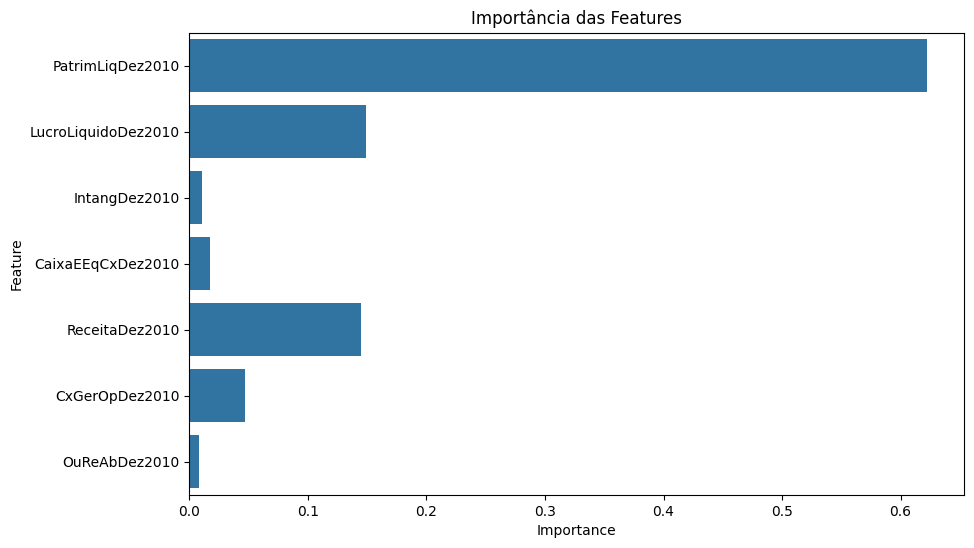

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar as features (X) e a variável dependente (y)
X = data[['PatrimLiqDez2010', 'LucroLiquidoDez2010', 'IntangDez2010',
       'CaixaEEqCxDez2010', 'ReceitaDez2010', 'CxGerOpDez2010',
       'OuReAbDez2010']]
y = data['ValorMercado30Jun11']

# Substituir os valores ausentes pela média de cada coluna
X = X.fillna(X.mean())
y = y.fillna(y.mean())  # Se houver valores ausentes em y, substituí-los também

# Configurar o K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Criar o modelo Random Forest para regressão com OOB ativado
model = RandomForestRegressor(n_estimators=100, max_depth=8, min_samples_split=15,
                              min_samples_leaf=10, random_state=42, oob_score=True)

# Listas para armazenar as métricas de cada fold
mse_train_scores = []
r2_train_scores = []
mse_test_scores = []
r2_test_scores = []
oob_scores = []

# Executar a validação cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões no conjunto de treino e teste
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular as métricas para o conjunto de treino
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Calcular as métricas para o conjunto de teste
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Armazenar as métricas
    mse_train_scores.append(mse_train)
    r2_train_scores.append(r2_train)
    mse_test_scores.append(mse_test)
    r2_test_scores.append(r2_test)

    # Armazenar o OOB score
    oob_scores.append(model.oob_score_)

# Calcular a média e desvio padrão das métricas
mean_mse_train = np.mean(mse_train_scores)
std_mse_train = np.std(mse_train_scores)
mean_r2_train = np.mean(r2_train_scores)
std_r2_train = np.std(r2_train_scores)

mean_mse_test = np.mean(mse_test_scores)
std_mse_test = np.std(mse_test_scores)
mean_r2_test = np.mean(r2_test_scores)
std_r2_test = np.std(r2_test_scores)

mean_oob_score = np.mean(oob_scores)
std_oob_score = np.std(oob_scores)

print(f"Mean Squared Error (MSE) Médio no Treino: {mean_mse_train:.2f} ± {std_mse_train:.2f}")
print(f"R-squared (R2) Médio no Treino: {mean_r2_train:.2f} ± {std_r2_train:.2f}")
print(f"Mean Squared Error (MSE) Médio no Teste: {mean_mse_test:.2f} ± {std_mse_test:.2f}")
print(f"R-squared (R2) Médio no Teste: {mean_r2_test:.2f} ± {std_r2_test:.2f}")
print(f"OOB Score Médio: {mean_oob_score:.4f} ± {std_oob_score:.4f}")

# Treinar o modelo em todos os dados
model.fit(X, y)

# Calcular a importância das features
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Visualizar a importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title('Importância das Features')
plt.show()
